In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Acme Insurance Company sells auto insurance directly to consumers via Vertical Search websites. 
#On these websites, consumers who are already shopping for auto insurance enter some information about themselves and 
#then are shown ads from insurance companies. Each ad shown is called an "impression" and each record in this table 
#represents one ad impression.

# These ads are shown based on an online auction where insurance companies bid to have their ad shown, 
# and the ads are shown in order based on the highest bid amount. The insurance companies only pay if 
# their ad is clicked on, but bidding higher will cause the ad to be shown higher in the ranking and is 
# more likely to be clicked on if it is in a higher position.

# Acme currently bids $10 for all customers, but is able to set different bid prices for different types of customers.
# For example, Acme could bid $10 for all customers with 1 vehicle and $12 for all customers with 2 vehicles. 

# Acme would like to come up with a bidding strategy which optimizes the cost per customer acquired while ensuring
# that for every 10,000 ads shown they are expected to acquire at least 400 customers. How should Acme set prices by 
# customers segment?
# The channel manager who buys advertising on this vertical search website would also like to know if in
# the course of your analysis you come across any other interesting findings!


In [3]:
Acme=pd.read_csv("Acme.csv")
Acme.policies_sold[Acme['policies_sold']== " -   "]=0
Acme.policies_sold[Acme['policies_sold']== " 1 "]=1
Acme.marital_status[Acme['marital_status']== "S"]=0
Acme.marital_status[Acme['marital_status']== "M"]=1
Acme.currently_insured[Acme['currently_insured']== "N"]=0
Acme.currently_insured[Acme['currently_insured']== "Y"]=1
Acme['clicked']=0
Acme.clicked[Acme[' clicked_ad ']== " 1 "]=1
Acme=Acme.drop(columns=[' clicked_ad ']);
# Acme['policy_sold']=0
# Acme.policy_sold[Acme['policies_sold']== " 1 "]=1
# Acme=Acme.drop(columns=['policies_sold']);


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site

In [184]:
Acme.head()

,impression_id,cost,currently_insured,number_of_vehicles,number_of_drivers,marital_status,ranked_as,policies_sold,clicked
0,1,10,0,1,1,1,1,1,1
1,2,10,0,2,1,1,4,0,0
2,3,10,0,1,1,0,2,0,0
3,4,10,1,2,1,1,5,0,0
4,5,10,1,2,2,0,4,0,0


In [185]:
len(Acme[Acme.policies_sold==1])
# len(Acme[(Acme.number_of_drivers==1)&(Acme.clicked==1)])
# len(Acme[(Acme.number_of_drivers==1)&(Acme.policies_sold==1)])
Acme.number_of_vehicles.value_counts()

2    6083
1    3917
Name: number_of_vehicles, dtype: int64

In [186]:
Perc_buy_rank=np.zeros([4,5,6])
for j in range(4):
    if j==1 or j==2:
        inc=1
    else:
        inc=0
    for i in range(5):
        a=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==0+inc)])
        b=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==0+inc)&(Acme.clicked==1)])
        c=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==0+inc)&(Acme.policies_sold==1)])
        if b==0 & a==0:
            Perc_buy_rank[j,i,0:3]=[0,0,0]
        else:
            if b==0:
                Perc_buy_rank[j,i,0:3]=[c/a,b/a,0]
            else:
                Perc_buy_rank[j,i,0:3]=[c/a,b/a,c/b]
        a=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==1+inc)])
        b=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==1+inc)&(Acme.clicked==1)])
        c=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==1+inc)&(Acme.policies_sold==1)])
        if b==0 & a==0:
            Perc_buy_rank[j,i,3:6]=[0,0,0]
        else:
            if b==0:
                Perc_buy_rank[j,i,3:6]=[c/a,b/a,0]
            else:
                Perc_buy_rank[j,i,3:6]=[c/a,b/a,c/b]

In [440]:
Perc_buy_rank=np.zeros([5,3])
# for j in range(4):
#     if j==1 or j==2:
#         inc=1
#     else:
#         inc=0
for i in range(5):
    a=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,2]==1)&(Acme.clicked==1)])/len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,2]==1)])
    b=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,2]==0)&(Acme.clicked==1)])/len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,2]==0)])
    print(a,b)
    if b==0 & a==0:
        Perc_buy_rank[i,0:3]=[0,0,0]
    else:
        if b==0:
            Perc_buy_rank[i,0:3]=[a,b,0]
        else:
            Perc_buy_rank[i,0:3]=[a,b,1]
Perc_buy_rank[:,1:3]

0.5333333333333333 0.5033025099075297


TypeError: unsupported operand type(s) for &: 'int' and 'float'

In [331]:
df=Acme.copy()
df=df[df.clicked==1]
df['rank_squared']=df.ranked_as**2
df['rank_cubed']=df.ranked_as**3
df['rank_forth']=df.ranked_as**4
df['drv_ins']=df.currently_insured*df.number_of_drivers
df['drv_ins']=df.currently_insured*df.number_of_drivers
df['ones']=1
df.head()


,impression_id,cost,currently_insured,number_of_vehicles,number_of_drivers,marital_status,ranked_as,policies_sold,clicked,rank_squared,rank_cubed,rank_forth,drv_ins,ones
0,1,10,0,1,1,1,1,1,1,1,1,1,0,1
8,9,10,0,2,1,1,3,1,1,9,27,81,0,1
16,17,10,0,1,2,1,2,1,1,4,8,16,0,1
19,20,10,1,2,1,1,5,0,1,25,125,625,1,1
27,28,10,0,1,2,0,1,1,1,1,1,1,0,1


In [363]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=2)
# result=pca.fit_transform(df[['currently_insured','number_of_vehicles','number_of_drivers','marital_status']])


In [364]:
# sold=result[df['policies_sold']==1]
# not_sold=result[df['policies_sold']==0]
# plt.scatter(sold[:,0],sold[:,1])
# plt.scatter(not_sold[:,0],not_sold[:,1])

In [365]:
from sklearn.linear_model import LinearRegression
sales = LinearRegression(copy_X = True)
# reg.fit(df[['currently_insured','number_of_vehicles','number_of_drivers','marital_status','ranked_as','rank_squared']],
#         df['policies_sold'])
sales.fit(df[['ranked_as','rank_squared']],
        df['policies_sold'])
print(sales.coef_)
res=sales.predict(df[['ranked_as','rank_squared']])-df['policies_sold']
np.linalg.norm(res)

[-0.17648805  0.02989135]


18.033538620219908

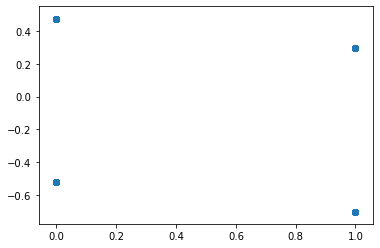

In [358]:
plt.scatter(df.currently_insured,res)

In [366]:
from sklearn.linear_model import LinearRegression
sales = LinearRegression(copy_X = True)
# reg.fit(df[['currently_insured','number_of_vehicles','number_of_drivers','marital_status','ranked_as','rank_squared']],
#         df['policies_sold'])
sales.fit(df[['currently_insured','number_of_vehicles','number_of_drivers','marital_status']],
        df['policies_sold'])
print(sales.coef_)
res=sales.predict(df[['currently_insured','number_of_vehicles','number_of_drivers','marital_status']])-df['policies_sold']
np.linalg.norm(res)

[-0.17989048 -0.10213406 -0.15009799 -0.06459661]


17.628673952934943

In [389]:
str(sales_percent[j])

'0.5714285714285714'

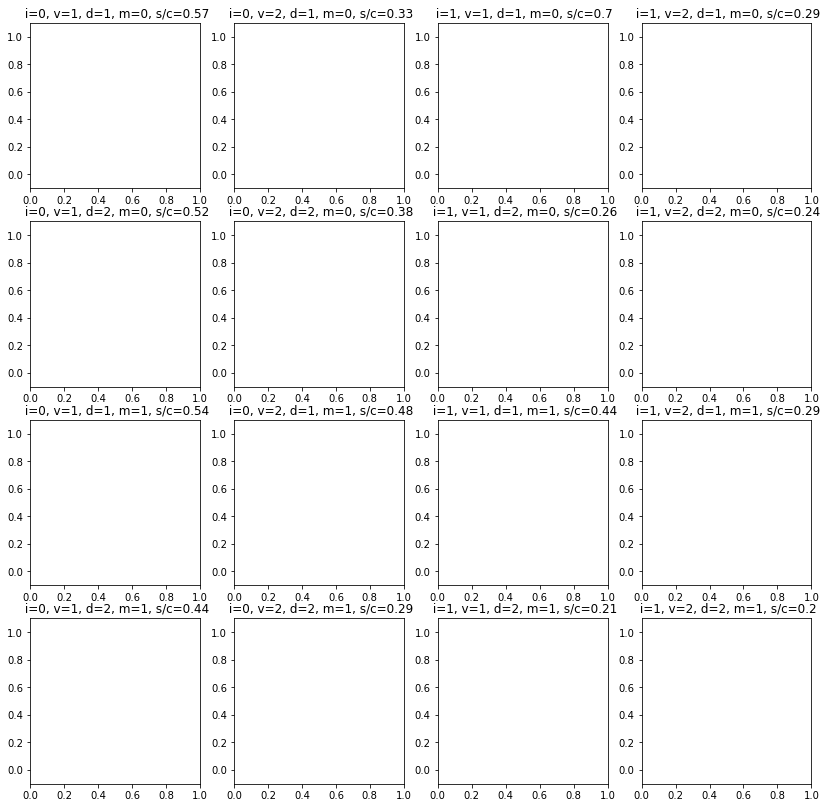

In [400]:
plt.figure(figsize=(14,14))
for j in range(16):
    plt.subplot(4,4,j+1)
    num=str(sales_percent[j])
    plt.ylim(-.1,1.1)
    plt.title(" i=" + str(lst[j,0]) + ", v=" + str(lst[j,1]) + ", d="+ str(lst[j,2]) +
              ", m="+ str(lst[j,3]) + ", s/c="+ str(round(sales_percent[j],2)))
plt.show()

In [386]:
sales_percent

array([0.57142857, 0.33333333, 0.7       , 0.28571429, 0.51724138,
       0.38095238, 0.25619835, 0.23684211, 0.5398773 , 0.47663551,
       0.43537415, 0.28828829, 0.44210526, 0.29268293, 0.21481481,
       0.19565217])

In [382]:
bin_percent=np.zeros(16)
x=np.array([0,1])
lst=np.array(np.meshgrid(x, x, x, x)).T.reshape(-1,4)
lst[:,1:3]=lst[:,1:3]+1
sales_percent=np.zeros(16)
sales_pred=np.zeros(16)
for j in range(16):
    df=Acme[(Acme.iloc[:,2]==lst[j,0])&(Acme.iloc[:,3]==lst[j,1])&(Acme.iloc[:,4]==lst[j,2])&(Acme.iloc[:,5]==lst[j,3])]
    bin_percent[j]=len(df)/len(Acme)
    sales_percent[j]=len(df[df.policies_sold==1])/len(df[df.clicked==1])
    sales_pred[j]=sales.predict([[lst[j,0],lst[j,1],lst[j,2],lst[j,3]]])

In [446]:
cent=pd.read_csv("center.csv")
df=cent.copy()
c=np.sqrt(20)
df['bin_percent']=bin_percent
df['sales_percent']=sales_percent
df['mar_driver_1']=(1-df.marital_status)*(2-df.number_of_drivers)
df['mar_driver_2']=(1-2*df.marital_status)*(2-df.number_of_drivers)
df['mv_exp']=c**-df['mar_driver_2']
df['veh_mv_exp']=(2-df.number_of_vehicles)*df.mv_exp
df['veh_drv']=(2-df.number_of_vehicles)*(2-df.number_of_drivers)
df['neg_exp_vd']=(-1)**(df.number_of_vehicles+df.number_of_drivers)
df['neg_exp_vd_mar_1']=df['mar_driver_1']*df['neg_exp_vd']
df['eq_5']=(5==df.currently_insured+2*df.number_of_vehicles+df.number_of_drivers)
df.head(16)

,currently_insured,number_of_vehicles,number_of_drivers,marital_status,centers,bin_percent,sales_percent,mar_driver_1,mar_driver_2,mv_exp,veh_mv_exp,veh_drv,neg_exp_vd,neg_exp_vd_mar_1,eq_5
0,0,1,1,0,2.692308,0.0039,0.571429,1,1,0.223607,0.223607,1,1,1,False
1,0,2,1,0,4.513514,0.0111,0.333333,1,1,0.223607,0.000000,0,-1,-1,True
2,1,1,1,0,2.589744,0.0039,0.700000,1,1,0.223607,0.223607,1,1,1,False
3,1,2,1,0,4.548387,0.0093,0.285714,1,1,0.223607,0.000000,0,-1,-1,False
4,0,1,2,0,1.504394,0.0569,0.517241,0,0,1.000000,1.000000,0,-1,0,False
5,0,2,2,0,3.471074,0.0484,0.380952,0,0,1.000000,0.000000,0,1,0,False
6,1,1,2,0,2.531516,0.0587,0.256198,0,0,1.000000,1.000000,0,-1,0,True
7,1,2,2,0,3.534368,0.0451,0.236842,0,0,1.000000,0.000000,0,1,0,False
8,0,1,1,1,2.528150,0.0746,0.539877,0,-1,4.472136,4.472136,1,1,0,False
9,0,2,1,1,4.501242,0.2013,0.476636,0,-1,4.472136,0.000000,0,-1,0,True


In [447]:
from sklearn.linear_model import LinearRegression
bins = LinearRegression(copy_X = True)
bins.fit(df[['mv_exp','veh_mv_exp','veh_drv','neg_exp_vd','neg_exp_vd_mar_1']],
        df['bin_percent'])
print(bins.coef_)
res=bins.predict(df[['mv_exp','veh_mv_exp','veh_drv','neg_exp_vd','neg_exp_vd_mar_1']])-df['bin_percent']
np.linalg.norm(res)
print(res)

[ 0.03772954 -0.01347292 -0.04199937 -0.01359896  0.03295496]
0     4.250073e-17
1    -9.000000e-04
2     4.250073e-17
3     9.000000e-04
4     2.075000e-03
5    -3.150000e-03
6     2.750000e-04
7     1.500000e-04
8    -6.000000e-04
9     2.150000e-03
10    6.000000e-04
11   -2.150000e-03
12   -1.925000e-03
13    1.550000e-03
14   -4.250000e-04
15    1.450000e-03
Name: bin_percent, dtype: float64


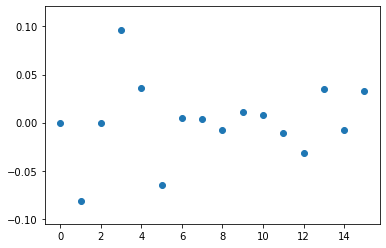

In [448]:
plt.scatter(range(16),res/df.bin_percent)

In [238]:
from sklearn.linear_model import LinearRegression
cent_pred = LinearRegression(copy_X = True)
cent_pred.fit(df[['currently_insured','number_of_vehicles','number_of_drivers','marital_status','eq_5']],
        df['centers'])
print(reg.coef_)
res=cent_pred.predict(df[['currently_insured','number_of_vehicles','number_of_drivers','marital_status','eq_5']])-df['centers']
# print(res)
np.linalg.norm(res)

[ 0.03772954 -0.01347292 -0.04199937 -0.01359896  0.03295496]


0.5632535122752919

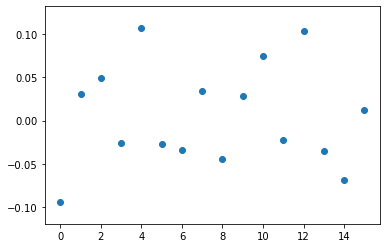

In [239]:
plt.scatter(range(16),res/df.centers)

In [28]:
search_out=np.array([2,3,4,2,1,0])
approx_shift=np.zeros([2,5])
approx_shift[0,:]=range(5)
approx_shift[1,:]=np.array([.25,.01,0,-.09,-.02])
Pred_by_rank=np.zeros([16,5,5])

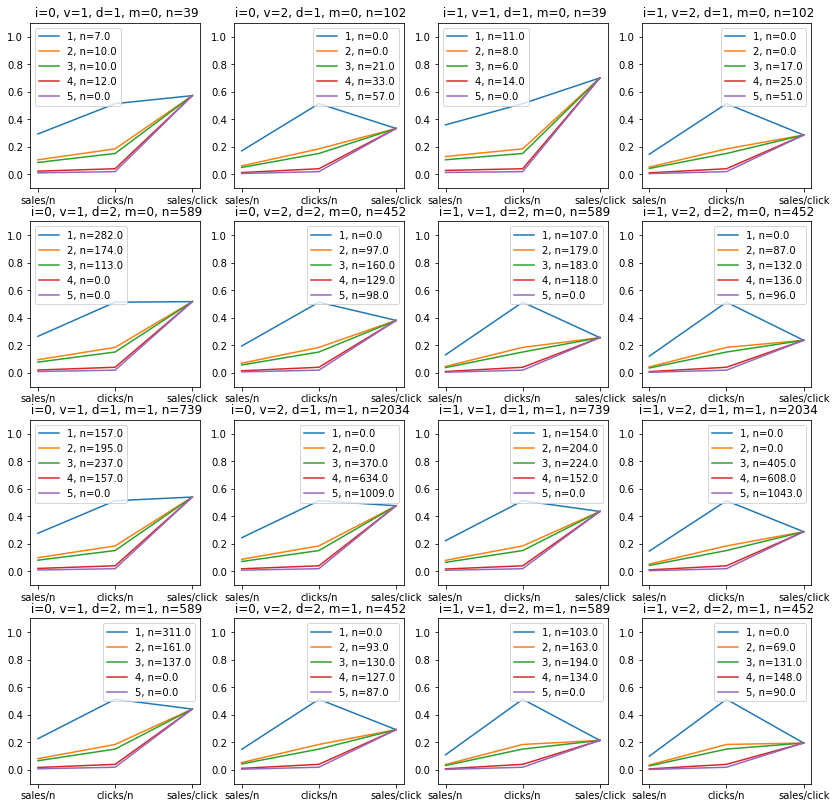

In [450]:
for i in range(5):
    Pred_by_rank[:,i,1]=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.clicked==1)])/len(Acme[Acme.iloc[:,6]==i+1])
for j in range(16):
    df=Acme[(Acme.iloc[:,2]==lst[j,0])&(Acme.iloc[:,3]==lst[j,1])&(Acme.iloc[:,4]==lst[j,2])&(Acme.iloc[:,5]==lst[j,3])]
    Pred_by_rank[j,:,2]=len(df[(df.policies_sold==1)])/len(df[(df.clicked==1)])

# df['mar_driver_1']=(1-df.marital_status)*(2-df.number_of_drivers)
# df['mar_driver_2']=(1-2*df.marital_status)*(2-df.number_of_drivers)
# df['mv_exp']=c**-df['mar_driver_2']
# df['veh_mv_exp']=(2-df.number_of_vehicles)*df.mv_exp
# df['veh_drv']=(2-df.number_of_vehicles)*(2-df.number_of_drivers)
# df['neg_exp_vd']=(-1)**(df.number_of_vehicles+df.number_of_drivers)
# df['neg_exp_vd_mar_1']=df['mar_driver_1']*df['neg_exp_vd']
    mv_exp=np.sqrt(20)**-((1-2*lst[j,3])*(2-lst[j,2]))
    veh_mv_exp=(2-lst[j,1])*mv_exp
    veh_drv=(2-lst[j,1])*(2-lst[j,2])
    neg_exp_vd=(-1)**(lst[j,2]+lst[j,1])
    neg_exp_vd_mar_1=((1-lst[j,3])*(2-lst[j,2]))*neg_exp_vd
    Pred_by_rank[j,:,4]=bins.predict([[mv_exp,veh_mv_exp,veh_drv,neg_exp_vd,neg_exp_vd_mar_1]])*10000
    
    for i in range(5):
        Pred_by_rank[j,i,3]=len(df[df.iloc[:,6]==i+1]) #maybe bins.predict and pdf
        Pred_by_rank[j,i,0]=Pred_by_rank[j,i,1]*Pred_by_rank[j,i,2]
plt.figure(figsize=(14,14))
for j in range(16):
    plt.subplot(4,4,j+1)
    for i in range(5):
        num=str(i+1) + ", n=" + str(Pred_by_rank[j,i,3])
        plt.plot(range(3),Pred_by_rank[j,i,0:3], label = num)
    plt.legend(fontsize=10)
    plt.xticks(np.arange(3), ('sales/n', 'clicks/n', 'sales/click'))
    plt.ylim(-.1,1.1)
    plt.title(" i=" + str(lst[j,0]) + ", v=" + str(lst[j,1]) + ", d="+ str(lst[j,2]) +
              ", m="+ str(lst[j,3]) + ", n="+ str(int(Pred_by_rank[j,0,4])))
plt.show()

In [429]:
for i in range(5):
    Pred_by_rank[:,i,1]=len(Acme[(Acme.iloc[:,6]==1)&(Acme.clicked==1)])/len(Acme[Acme.iloc[:,6]==1])

In [451]:
Pred_by_rank

array([[[2.93286219e-01, 5.13250883e-01, 5.71428571e-01, 7.00000000e+00,
         3.90000000e+01],
        [1.05952381e-01, 1.85416667e-01, 5.71428571e-01, 1.00000000e+01,
         3.90000000e+01],
        [8.67553499e-02, 1.51821862e-01, 5.71428571e-01, 1.00000000e+01,
         3.90000000e+01],
        [2.35446465e-02, 4.12031314e-02, 5.71428571e-01, 1.20000000e+01,
         3.90000000e+01],
        [1.15143647e-02, 2.01501383e-02, 5.71428571e-01, 0.00000000e+00,
         3.90000000e+01]],

       [[1.71083628e-01, 5.13250883e-01, 3.33333333e-01, 0.00000000e+00,
         1.02000000e+02],
        [6.18055556e-02, 1.85416667e-01, 3.33333333e-01, 0.00000000e+00,
         1.02000000e+02],
        [5.06072874e-02, 1.51821862e-01, 3.33333333e-01, 2.10000000e+01,
         1.02000000e+02],
        [1.37343771e-02, 4.12031314e-02, 3.33333333e-01, 3.30000000e+01,
         1.02000000e+02],
        [6.71671276e-03, 2.01501383e-02, 3.33333333e-01, 5.70000000e+01,
         1.02000000e+02]],

      

In [417]:
len(Acme[Acme.iloc[:,6]==1])

1132